In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("mushroom.txt")

In [ ]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [ ]:
mode_value = 'b'
df['stalk-root'].fillna(mode_value, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [ ]:
df.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [ ]:
print("Dataset shape:", df.shape)

Dataset shape: (8124, 23)


In [ ]:
df['poisonous'].value_counts()

e    4208
p    3916
Name: poisonous, dtype: int64

In [ ]:
df["poisonous"].unique()

array(['p', 'e'], dtype=object)

In [ ]:
#df = df.astype('category')
#df.dtypes

cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
poisonous                   category
dtype: object

In [ ]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [ ]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0


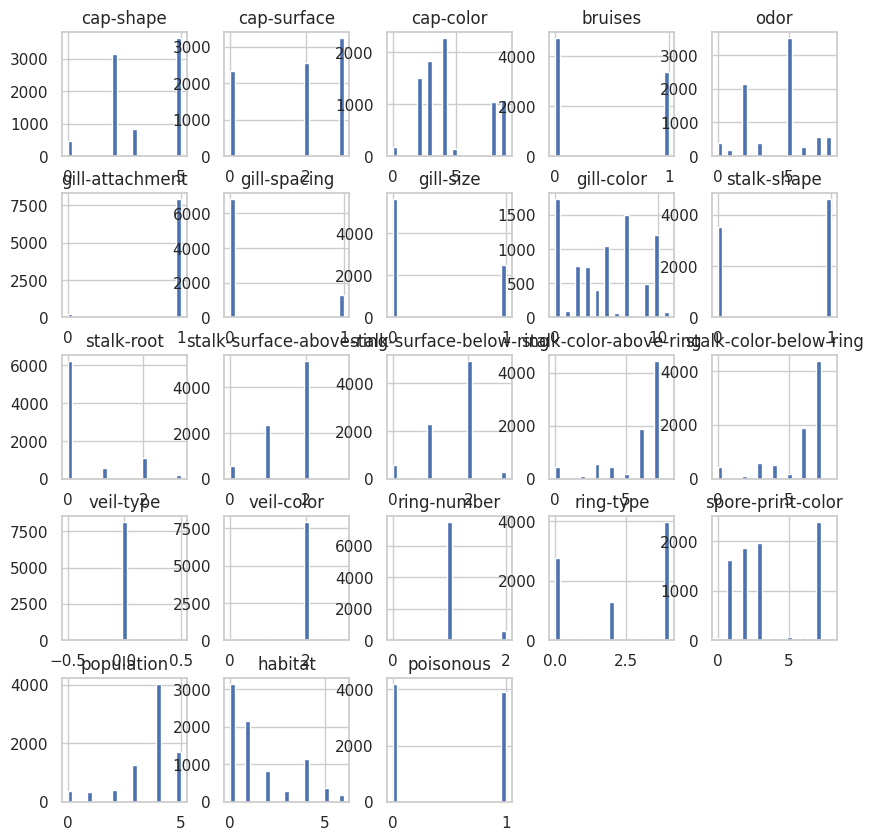

In [ ]:
df.hist(bins=23,figsize=(10,10))
plt.show()

In [ ]:
df=df.drop(["veil-type"],axis=1)

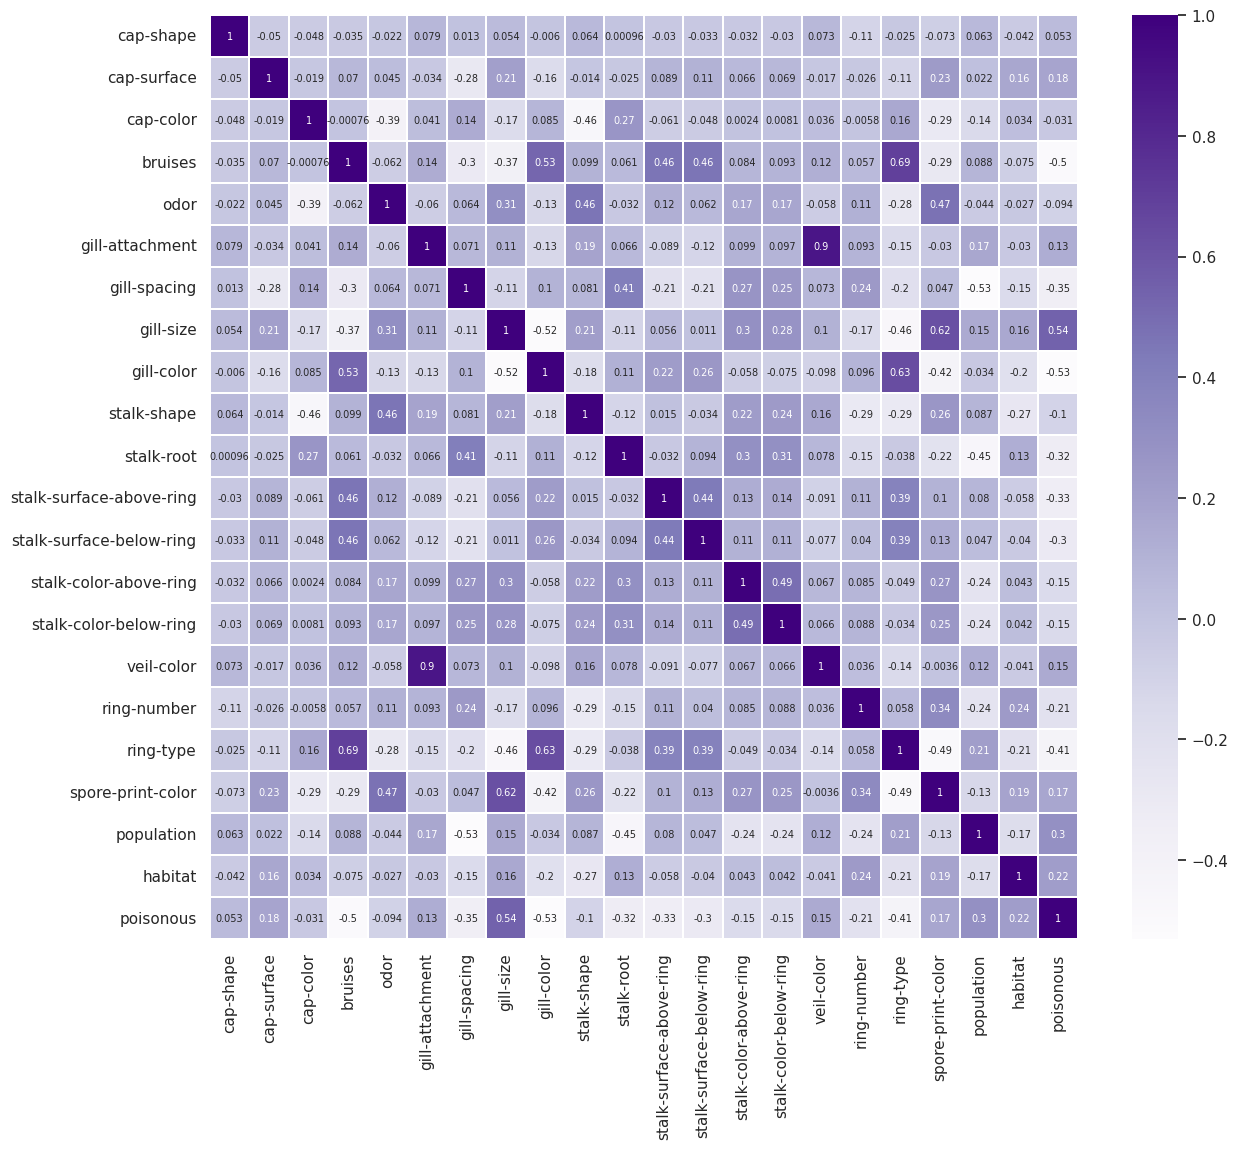

In [ ]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=900, bbox_inches='tight')

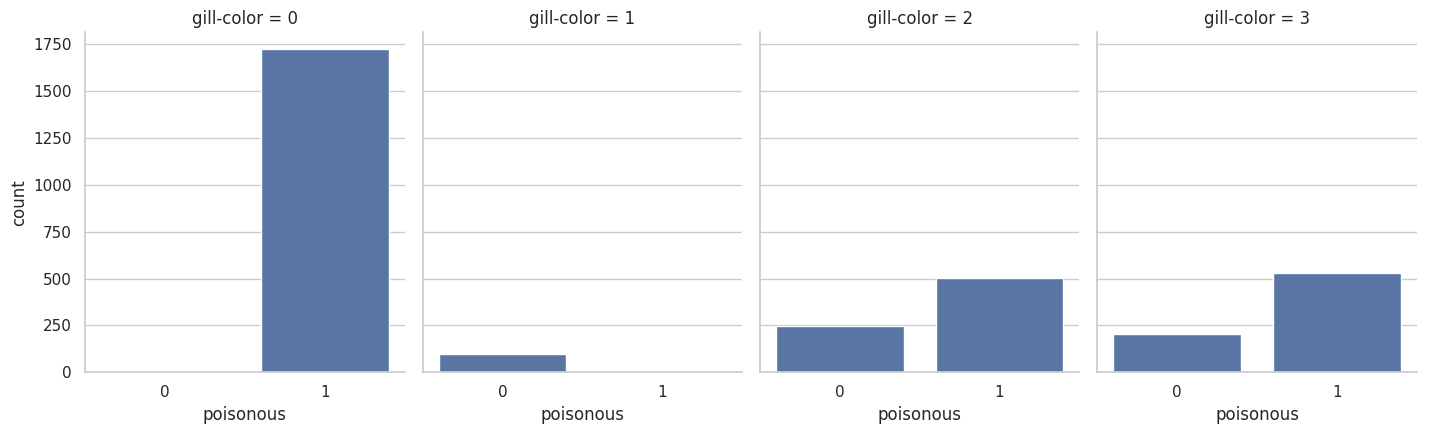

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
new_var = df[['poisonous', 'gill-color']]
new_var = new_var[new_var['gill-color'] <= 3.5]

# Using catplot instead of factorplot
sns.catplot(x='poisonous', col='gill-color', data=new_var, kind='count', height=4.5, aspect=0.8, col_wrap=4)
#plt.savefig("gillcolor1.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

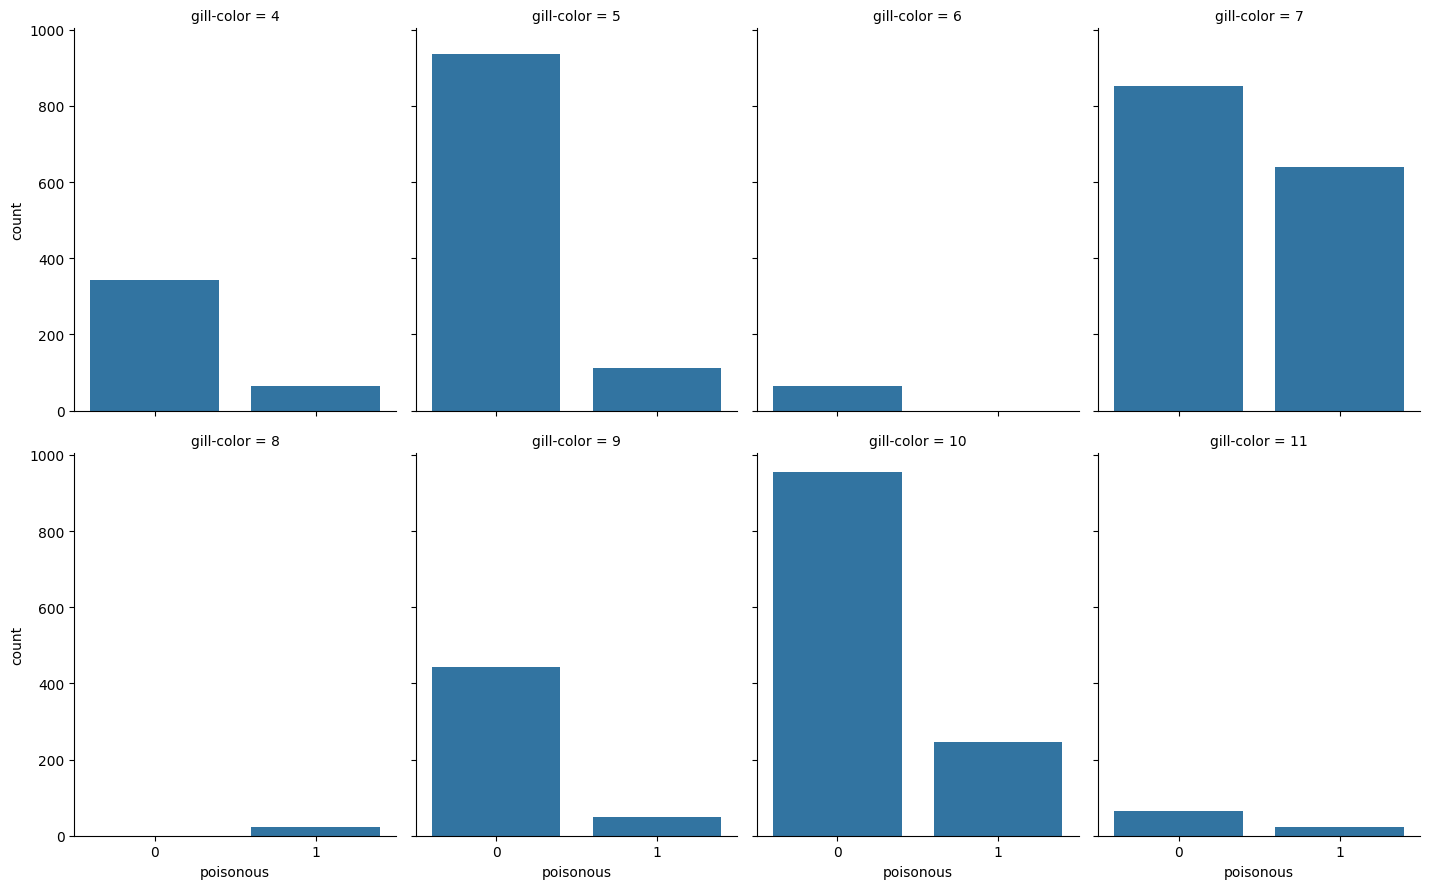

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
new_var = df[['poisonous', 'gill-color']]
new_var = new_var[new_var['gill-color'] > 3.5]

# Using catplot instead of factorplot
sns.catplot(x='poisonous', col='gill-color', data=new_var, kind='count', height=4.5, aspect=0.8, col_wrap=4)
#plt.savefig("gillcolor1.png", format='png', dpi=900, bbox_inches='tight')
plt.show()


In [ ]:
X = df.drop(['poisonous'], axis=1)
y = df["poisonous"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import shuffle

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, random_state=None):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.random_state = random_state

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        X, y = shuffle(X, y, random_state=self.random_state)

        for _ in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(z)

            dw = (1 / m) * np.dot(X.T, (predictions - y))
            db = (1 / m) * np.sum(predictions - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return np.round(predictions)

    def evaluate(self, X, y):
        predictions = self.predict(X)
        accuracy = accuracy_score(y, predictions)
        report = classification_report(y, predictions)
        return accuracy, report

    def score(self, X, y):
        accuracy, _ = self.evaluate(X, y)
        return accuracy

model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy, report = model.evaluate(X_test, y_test)

print("Classifier Report:")
print(report)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Classifier Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       433
           1       0.91      0.83      0.87       380

    accuracy                           0.88       813
   macro avg       0.89      0.88      0.88       813
weighted avg       0.88      0.88      0.88       813

Test Accuracy: 88.31%


In [ ]:
def plot_class_distribution(y, title):
    sns.set(style="whitegrid")
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=y, palette='Set1')
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')

    # Print counts on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

    plt.show()

<ipython-input-22-308b4fde1375>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y, palette='Set1')


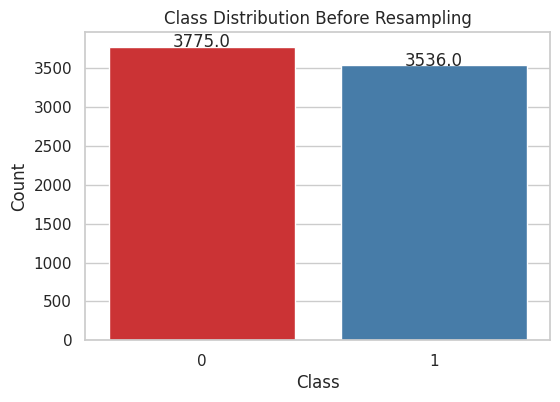

In [ ]:
plot_class_distribution(y_train, 'Class Distribution Before Resampling')

<ipython-input-22-308b4fde1375>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y, palette='Set1')


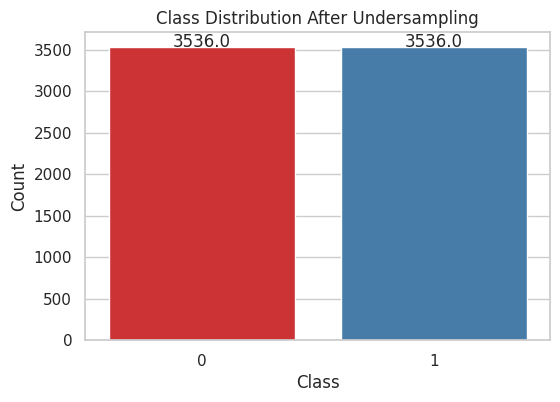


Logistic Regression Classifier (with Undersampling) report: 

               precision    recall  f1-score   support

           0       0.87      0.92      0.89       433
           1       0.90      0.84      0.87       380

    accuracy                           0.88       813
   macro avg       0.88      0.88      0.88       813
weighted avg       0.88      0.88      0.88       813

Test Accuracy (with Undersampling): 88.19%


In [ ]:
# Undersampling using RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)
lr_undersampled = LogisticRegression(random_state=42)
lr_undersampled.fit(X_train_undersampled, y_train_undersampled)
y_pred_lr_undersampled = lr_undersampled.predict(X_test)
plot_class_distribution(y_train_undersampled, 'Class Distribution After Undersampling')
print("\nLogistic Regression Classifier (with Undersampling) report: \n\n", classification_report(y_test, y_pred_lr_undersampled))
print("Test Accuracy (with Undersampling): {:.2f}%".format(lr_undersampled.score(X_test, y_test) * 100))

<ipython-input-22-308b4fde1375>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y, palette='Set1')


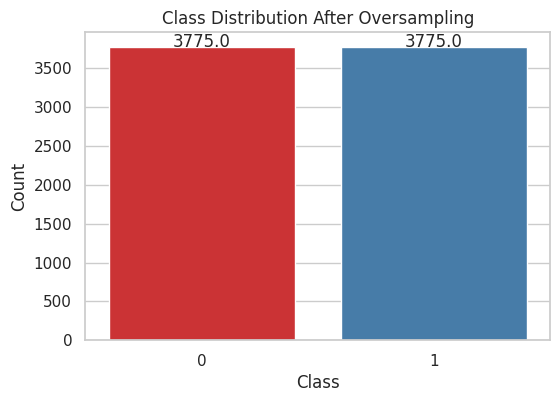


Logistic Regression Classifier (with Oversampling) report: 

               precision    recall  f1-score   support

           0       0.90      0.94      0.92       433
           1       0.93      0.88      0.91       380

    accuracy                           0.92       813
   macro avg       0.92      0.91      0.91       813
weighted avg       0.92      0.92      0.91       813

Test Accuracy (with Oversampling): 91.51%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(num_iterations=1000, random_state=42)

# Oversampling using RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train_scaled, y_train)

lr_oversampled = LogisticRegression(random_state=42)
lr_oversampled.fit(X_train_oversampled, y_train_oversampled)

y_pred_lr_oversampled = lr_oversampled.predict(X_test_scaled)
plot_class_distribution(y_train_oversampled, 'Class Distribution After Oversampling')
print("\nLogistic Regression Classifier (with Oversampling) report: \n\n", classification_report(y_test, y_pred_lr_oversampled))
print("Test Accuracy (with Oversampling): {:.2f}%".format(lr_oversampled.score(X_test_scaled, y_test) * 100))

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state=42))

y_pred_cv = cross_val_predict(model, X_train, y_train, cv=5)

print("Cross-Validation Classifier report: \n\n", classification_report(y_train, y_pred_cv))
print("Mean CV Accuracy: {:.2f}%".format(np.mean(cross_val_score(model, X_train, y_train, cv=10)) * 100))


Cross-Validation Classifier report: 

               precision    recall  f1-score   support

           0       0.97      0.97      0.97      3775
           1       0.96      0.97      0.96      3536

    accuracy                           0.97      7311
   macro avg       0.97      0.97      0.97      7311
weighted avg       0.97      0.97      0.97      7311

Mean CV Accuracy: 96.68%
